**Nama:** Insania Cindy Puan Fadilahsari

**Email:** insaniacindy12312@gmail.com

**ID Dicoding:** insanniaa

# **1. Import Library**

In [ ]:
import pandas as pd
import datetime as dt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# **2. Memuat Dataset dari Hasil Clustering**

In [ ]:
drive.mount('/content/drive')
rfm = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projekmlpemula/rfmclustering.csv')
rfm

Mounted at /content/drive


,Recency,Frequency,Monetary,Cluster
0,325,12,400.940,0
1,1,8,4426.775,1
2,74,5,779.730,0
3,18,4,3347.990,1
4,309,1,301.900,0
...,...,...,...,...
5876,3,16,2703.000,1
5877,431,1,374.030,0
5878,660,1,229.550,0
5879,476,2,1162.690,0


# **3. Data Splitting**

Melakukan pembagian data, dimana data x akan digunakan sebagai input dan data y akan digunakan sebagai target.

In [ ]:
X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['Cluster']

Disini saya membagi data dengan rasio 80:20. 80% data untuk data training (data latih) dan 20% untuk data testing (data uji).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dikarenakan jumlah anggota pada masing-masing cluster tidak seimbang, yaitu cluster 0 memiliki 4568 anggota dan cluster 1 memiliki 1313 anggota. Oleh karena itu, disini saya menggunakan SMOTE untuk menangani imbalance data tersebut. SMOTE ini dia tidak menduplikasi data yang ada pada data minoritas, tetapi dia membuat data baru yang mirip dengan data asli minoritas tetapi tidak sama persis.

In [ ]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Dalam proyek ini saya menggunakan 3 model, di antaranya adaah Random Forest, Logistic Regression, dan Support Vector Machine (SVM)

### Membangun Model Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

Random Forest merupakan algoritma ensemble, dimana dia menggabungkan beberapa decision tree untuk meningkatkan akurasi dan mengurangi overfitting. Setiap pohon (tree) dilatih pada subset data acak, dan keputusan akhir didasarkan pada mayoritas suara dari semua pohon (tree). Dalam hal ini, model Random Forest digunakan untuk mempelajari hubungan antara fitur yang ada (Recency, Frequency, Monetary) dengan target cluster, dengan tujuan untuk memprediksi cluster mana yang akan diterima oleh data uji.

### Membangun Model Logistic Regression

In [ ]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000, random_state=42)

Logistic Regression merupakan algoritma yang bertujuan untuk memprediksi probabilitas suatu kelas berdasarkan fungsi logistik (sigmoid function). Dalam hal ini, model Logistic Regression digunakan untuk mengklasifikasikan data berdasarkan fitur yang relevan (Recency, Frequency, Monetary) dan target cluster yang telah ditentukan.

### Membangun Model Support Vector Machine (SVM)

In [ ]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train_res, y_train_res)

SVC(random_state=42)

Support Vector Machine (SVM) adalah algoritma klasifikasi yang efektif dalam mencari hyperplane terbaik untuk memisahkan data ke dalam dua kelas. Dalam hal ini, SVM digunakan untuk memprediksi cluster berdasarkan fitur yang ada.

## **b. Evaluasi Model Klasifikasi**

### Evaluasi Model Random Forest

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 1.0000


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       910
           1       1.00      1.00      1.00       267

    accuracy                           1.00      1177
   macro avg       1.00      1.00      1.00      1177
weighted avg       1.00      1.00      1.00      1177



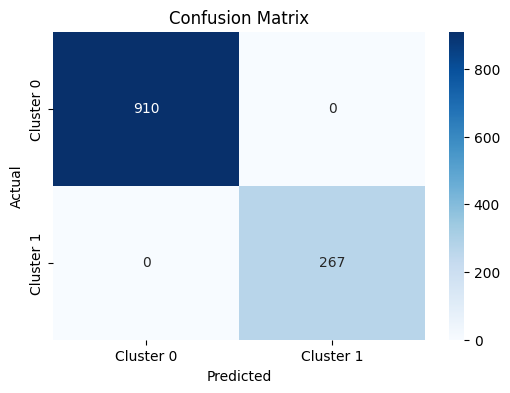

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 0', 'Cluster 1'], yticklabels=['Cluster 0', 'Cluster 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Evaluasi Model Logistic Regression

In [ ]:
y_pred_lr = lr_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_lr)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 1.0000


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       910
           1       1.00      1.00      1.00       267

    accuracy                           1.00      1177
   macro avg       1.00      1.00      1.00      1177
weighted avg       1.00      1.00      1.00      1177



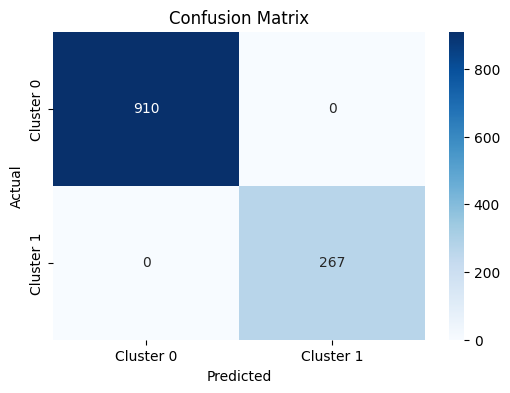

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 0', 'Cluster 1'], yticklabels=['Cluster 0', 'Cluster 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Evaluasi Model SVM

In [ ]:
y_pred_svm = svm_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9949


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       910
           1       0.98      1.00      0.99       267

    accuracy                           0.99      1177
   macro avg       0.99      1.00      0.99      1177
weighted avg       1.00      0.99      0.99      1177



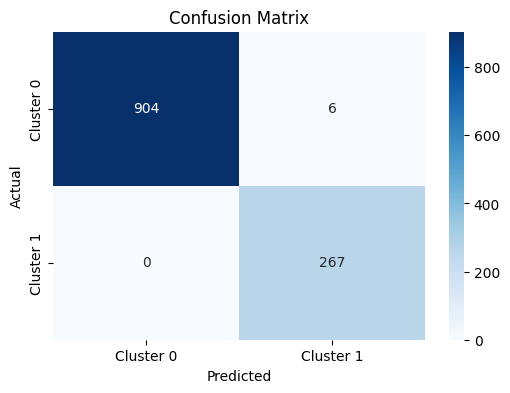

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 0', 'Cluster 1'], yticklabels=['Cluster 0', 'Cluster 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Kesimpulan Hasil Evaluasi

1. Random Forest Classifier
  
  Model Random Forest menunjukkan kinerja yang sangat baik dengan akurasi 1.0000, dan semua metrik (precision, recall, dan f1-score) berada pada nilai sempurna (1.00) untuk kedua kelas. Confusion matrix juga menunjukkan hasil yang sangat baik, di mana tidak ada kesalahan prediksi (910 benar pada kelas 0 dan 267 benar pada kelas 1).

2. Logistic Regression

  Model Logistic Regression juga menghasilkan akurasi sempurna 1.0000, dengan nilai precision, recall, dan f1-score yang sangat tinggi (1.00) untuk kedua kelas. Hasil confusion matrix menunjukkan bahwa model ini juga tidak melakukan kesalahan prediksi.

3. Support Vector Machine (SVM)

  Model SVM sedikit berbeda, dengan akurasi 0.9949, yang masih sangat tinggi. Namun, precision dan recall untuk kelas 0 sedikit lebih rendah (1.00 dan 0.99, masing-masing), serta untuk kelas 1 (0.98 dan 1.00). Confusion matrix menunjukkan beberapa kesalahan pada kelas 0 (6 kesalahan), meskipun tidak ada kesalahan pada kelas 1.

Secara keseluruhan, Random Forest dan Logistic Regression menunjukkan hasil yang sangat baik dengan akurasi sempurna dan tidak ada kesalahan pada prediksi. SVM, meskipun sangat baik, sedikit lebih rendah dalam akurasi dan precision untuk kelas 0. Namun, perbedaan antara ketiga model ini sangat kecil, dengan Random Forest dan Logistic Regression menjadi pilihan terbaik karena akurasi dan performa sempurna yang mereka capai pada data uji.

## **c. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Identifikasi kelemahan model

  Berdasarkan hasil evaluasi, baik model Random Forest, Logistic Regression, maupun Support Vector Machine (SVM) menunjukkan kinerja yang sangat baik, dengan sebagian besar metrik seperti precision, recall, dan f1-score mencapai nilai sempurna (1.00) untuk kelas 0 dan kelas 1. Namun, model SVM sedikit menunjukkan kelemahan pada kelas 0, di mana precision-nya mencapai 0.99, dan recall-nya sedikit lebih rendah (0.99), meskipun kelas 1 menunjukkan hasil sempurna. Hal ini menunjukkan bahwa model SVM mungkin kesulitan dalam menangani kelas dominan (kelas 0), meskipun masih memiliki akurasi yang sangat tinggi.
  
  Secara umum, tidak ada indikasi overfitting atau underfitting, karena akurasi model sangat tinggi dan hasil confusion matrix menunjukkan sedikit atau tanpa kesalahan prediksi. Namun, SVM cenderung lebih rentan terhadap overfitting jika jumlah data yang lebih kecil digunakan atau jika data tidak sepenuhnya terstruktur dengan baik.

2. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

  - Meskipun model-model tersebut menunjukkan performa yang sangat baik, beberapa tindakan lanjutan masih dapat dipertimbangkan. Untuk model SVM, mungkin bisa dilakukan pengaturan lebih lanjut pada hyperparameter atau menggunakan teknik regularisasi yang lebih kuat untuk mengurangi kemungkinan overfitting, terutama jika data yang digunakan memiliki ketidakseimbangan atau outlier.
  - Untuk memastikan bahwa semua model tidak overfitting, maka dapat dilakukan cross-validation untuk mengevaluasi kinerja model secara lebih robust. Cross-validation, khususnya k-fold cross-validation, membagi data latih menjadi beberapa bagian (folds) dan melatih model pada setiap bagian data, serta menguji pada bagian yang tersisa. Proses ini dilakukan berulang kali untuk memastikan bahwa model tidak hanya menghafal data latih (overfitting), tetapi juga dapat generalisasi dengan baik pada data yang belum pernah dilihat.